**MINOR PROJECT**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from PIL import ImageFont, ImageDraw, Image
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore
import matplotlib.pyplot as plt
%matplotlib inline

female = '/content/drive/My Drive/nhanes_adult_female_bmx_2020.csv'
male = '/content/drive/My Drive/nhanes_adult_male_bmx_2020.csv'

female_df = pd.read_csv(female, comment='#')
male_df = pd.read_csv(male, comment='#')

Mounted at /content/drive


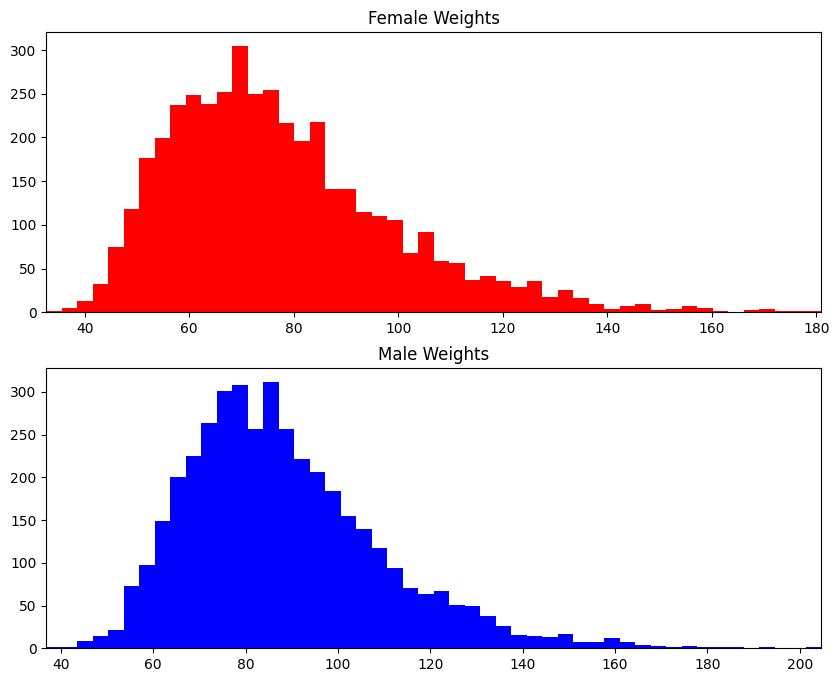

In [2]:
fig, (h1, h2) = plt.subplots(2, 1, figsize=(10, 8))

h1.hist(female_df['BMXWT'], bins=50, color='red')
h1.set_title('Female Weights')
h1.set_xlim([female_df['BMXWT'].min() ,female_df['BMXWT'].max()])

h2.hist(male_df['BMXWT'], bins=50, color='blue')
h2.set_title('Male Weights')
h2.set_xlim([male_df['BMXWT'].min() ,male_df['BMXWT'].max()])

plt.show()

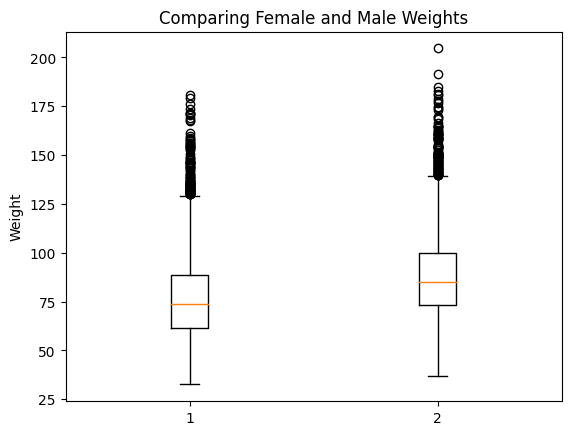

In [3]:
plt.figure()
plt.boxplot([female_df['BMXWT'], male_df['BMXWT']])
plt.title('Comparing Female and Male Weights')
plt.ylabel('Weight')
plt.show()

In [ ]:
female_df['BMXWT'].describe()

count    4081.000000
mean       88.364543
std        21.421561
min        36.800000
25%        73.300000
50%        85.000000
75%        99.800000
max       204.600000
Name: BMXWT, dtype: float64

In [ ]:
male_df['BMXWT'].describe()

count    4081.000000
mean       88.364543
std        21.421561
min        36.800000
25%        73.300000
50%        85.000000
75%        99.800000
max       204.600000
Name: BMXWT, dtype: float64

In [4]:
female_df['BMI'] = female_df['BMXWT'] / ((female_df['BMXHT'] / 100) ** 2)
female_df

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,BMI
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9,37.835041
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1,39.069720
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0,28.092655
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5,24.904378
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2,23.178791
...,...,...,...,...,...,...,...,...
4216,66.8,157.0,32.6,38.4,30.7,103.8,92.5,27.100491
4217,116.9,167.4,42.2,43.0,40.7,128.4,120.0,41.716091
4218,73.0,159.6,36.2,37.0,31.4,104.6,99.3,28.658740
4219,78.6,168.5,38.1,40.2,36.0,102.4,98.5,27.683611


In [5]:
zfemale = female_df.apply(zscore)
zfemale

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,BMI
0,0.914295,0.008950,-0.567395,1.132988,0.550845,1.083162,1.115785,0.996968
1,0.635776,-1.053068,-1.078931,-1.293492,1.032218,1.044755,0.265089,1.156175
2,-0.204423,0.150553,0.583563,0.261944,-0.162299,-0.190647,-0.372933,-0.259275
3,-0.728968,-0.387537,0.839332,-0.764643,-0.661500,-0.523501,-0.459152,-0.670391
4,-1.021413,-0.784024,-0.610023,-0.982404,-0.786301,-1.067590,-1.453546,-0.892899
...,...,...,...,...,...,...,...,...
4216,-0.492226,-0.444178,-1.462584,0.386379,-0.358414,-0.344272,-0.344193,-0.387211
4217,1.833408,1.028488,2.629710,1.817380,1.424448,1.230386,1.236491,1.497414
4218,-0.204423,-0.076011,0.072026,-0.049143,-0.233614,-0.293064,0.046667,-0.186281
4219,0.055528,1.184251,0.881960,0.946336,0.586503,-0.433887,0.000684,-0.312020


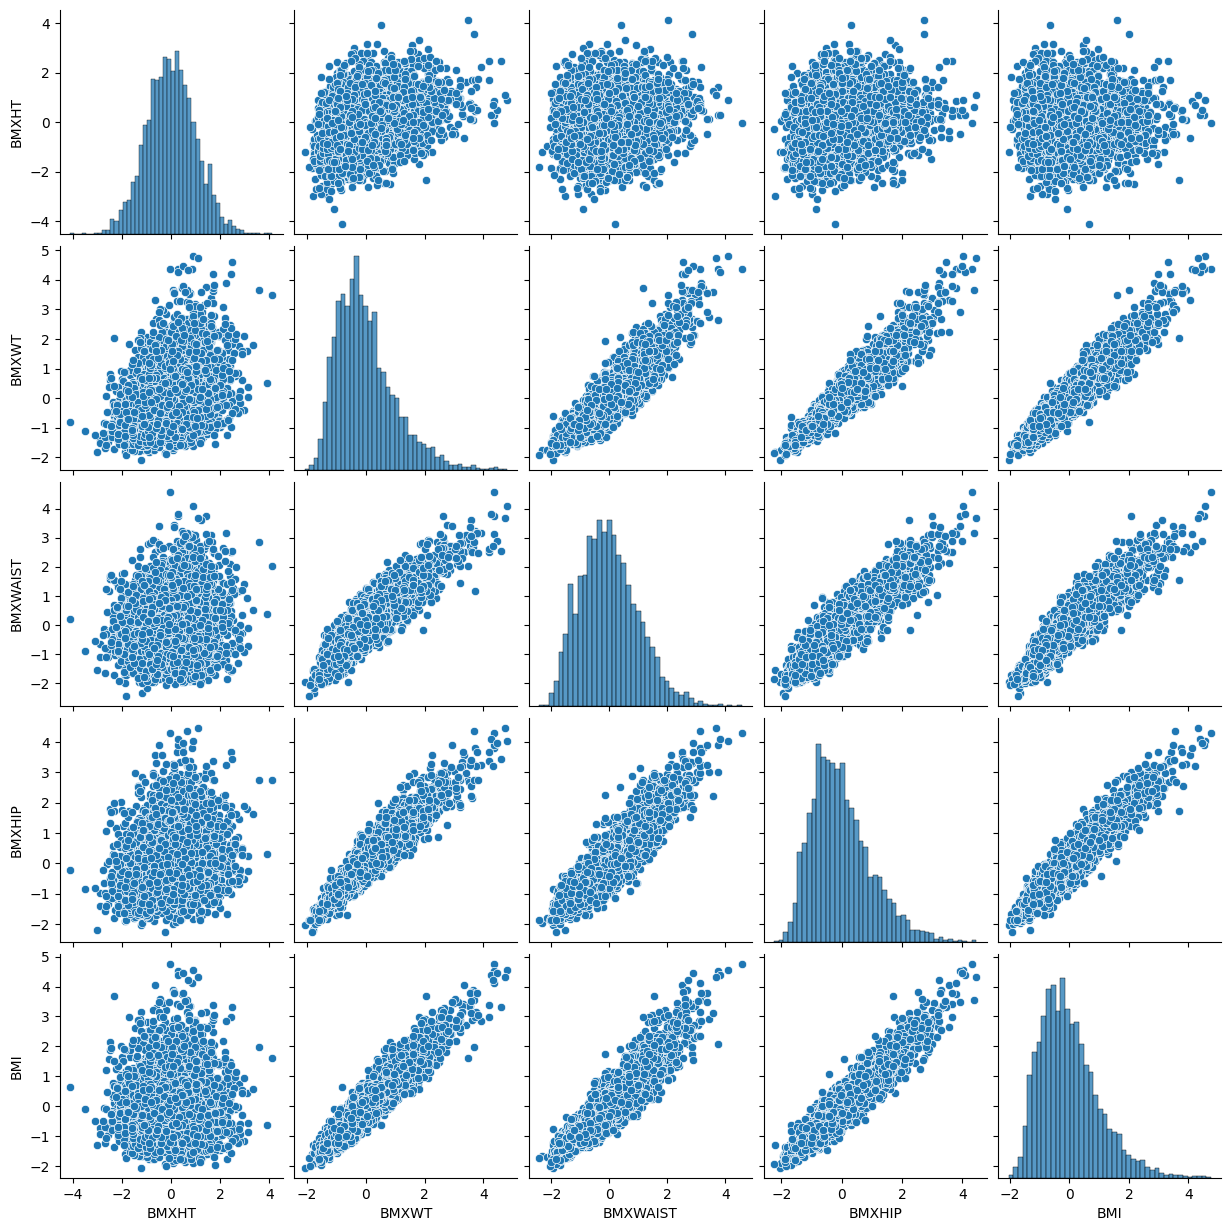

             BMXHT     BMXWT  BMXWAIST    BMXHIP       BMI
BMXHT     1.000000  0.345496  0.126547  0.202895  0.033077
BMXWT     0.345496  1.000000  0.904550  0.946553  0.945900
BMXWAIST  0.126547  0.904550  1.000000  0.897407  0.921198
BMXHIP    0.202895  0.946553  0.897407  1.000000  0.944199
BMI       0.033077  0.945900  0.921198  0.944199  1.000000
             BMXHT     BMXWT  BMXWAIST    BMXHIP       BMI
BMXHT     1.000000  0.338860  0.108587  0.205405  0.019897
BMXWT     0.338860  1.000000  0.900169  0.946634  0.937999
BMXWAIST  0.108587  0.900169  1.000000  0.888037  0.923114
BMXHIP    0.205405  0.946634  0.888037  1.000000  0.934196
BMI       0.019897  0.937999  0.923114  0.934196  1.000000


In [6]:
columns = ['BMXHT', 'BMXWT', 'BMXWAIST', 'BMXHIP', 'BMI']
subset = female_df[columns].apply(zscore)

sns.pairplot(subset)
plt.show()

pearson_corr = subset.corr(method='pearson')
print(pearson_corr)

spearman_corr = subset.corr(method='spearman')
print(spearman_corr)

In [7]:
female_df['WHR'] = female_df['BMXWAIST'] / female_df['BMXHT']
female_df['WHIPR'] = female_df['BMXWAIST'] / female_df['BMXHIP']
male_df['WHR'] = male_df['BMXWAIST'] / male_df['BMXHT']
male_df['WHIPR'] = male_df['BMXWAIST'] / male_df['BMXHIP']

Text(0.5, 0.98, 'Boxplot')

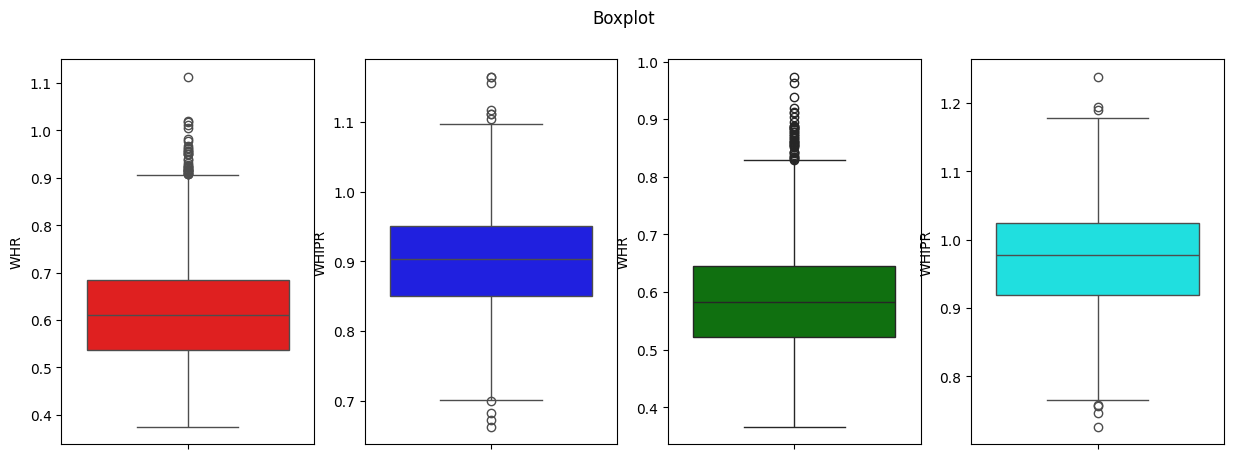

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(female_df['WHR'],color='red')

plt.subplot(1,4,2)
sns.boxplot(female_df['WHIPR'],color='blue')

plt.subplot(1,4,3)
sns.boxplot(male_df['WHR'],color = 'green')

plt.subplot(1,4,4)
sns.boxplot(male_df['WHIPR'],color = 'cyan')

plt.suptitle('Boxplot')

BMI

Advantages:

Simple to calculate and widely used.
Correlates with body fat and health risks.
Disadvantages:

Doesn't differentiate between muscle mass and fat.
Not accurate for certain populations (athletes, elderly, etc.)

Waist-to-Height Ratio

Advantages:

Simple to measure and understand.
Better predictor of abdominal fat than BMI.
Can identify health risks even in individuals with normal BMI.
Disadvantages:

Less established than BMI.
May not be suitable for all populations.

Waist-to-Hip Ratio

Advantages:

Assesses body fat distribution.
Predicts health risks associated with abdominal obesity.
Disadvantages:

Can be affected by factors like age and ethnicity.
May not be as accurate as other measures for certain populations.

In [11]:
lowest_bmi = np.argsort(zfemale['BMI'])[0:5]
highest_bmi = np.argsort(zfemale['BMI'])[-6:-1]

print('Lowest ',zfemale.iloc[lowest_bmi])

print('Highest ',zfemale.iloc[highest_bmi])

Lowest           BMXWT     BMXHT   BMXARML    BMXLEG   BMXARMC    BMXHIP  BMXWAIST  \
262  -2.079785 -1.222991 -1.547840 -1.169057 -2.194761 -2.040550 -1.942121   
3478 -1.880180 -0.189293 -1.718352  0.386379 -2.444362 -1.854919 -2.057080   
2126 -1.536673  1.807302  0.626191  0.573031 -2.266076 -1.675690 -1.706456   
2753 -1.843044 -0.260094 -0.226370  0.510814 -2.301733 -2.251784 -1.855902   
1209 -1.610945  0.886886 -0.098486  0.479705 -2.212590 -1.829315 -1.712204   

           BMI  
262  -2.050240  
3478 -1.994880  
2126 -1.970884  
2753 -1.941776  
1209 -1.893196  
Highest           BMXWT     BMXHT   BMXARML    BMXLEG   BMXARMC    BMXHIP  BMXWAIST  \
3513  4.725365  1.113450  2.246058 -1.137948  4.205711  4.469316  3.667872   
2268  4.247240  0.292155  1.862405 -0.982404  2.369364  4.104456  3.817318   
3022  4.456130  0.504559  1.691893 -1.137948  3.349938  3.982836  2.903395   
1472  4.349364  0.277995  2.842851  1.941815  4.366169  3.918826  3.754091   
1104  4.804279  0.8868